# Задание 8

И наконец, давайте оценим почасовую нагрузку на наш сервис, выясним, в какие часы пользователи оформляют больше всего заказов, и заодно проанализируем, как изменяется доля отмен в зависимости от времени оформления заказа.

Задача:

На основе данных в таблице orders для каждого часа в сутках рассчитайте следующие показатели:

1. Число успешных (доставленных) заказов.
2. Число отменённых заказов.
3. Долю отменённых заказов в общем числе заказов (cancel rate).
Колонки с показателями назовите соответственно successful_orders, canceled_orders, cancel_rate. Колонку с часом оформления заказа назовите hour. При расчёте доли отменённых заказов округляйте значения до трёх знаков после запятой.

Результирующая таблица должна быть отсортирована по возрастанию колонки с часом оформления заказа.

Поля в результирующей таблице: hour, successful_orders, canceled_orders, cancel_rate

```sql
WITH suc_ords AS (
  SELECT
    DATE_PART('hour', creation_time) :: int AS hour,
    COUNT(DISTINCT order_id) AS successful_orders
  FROM
    orders
  WHERE
    order_id NOT in (
      SELECT
        order_id
      FROM
        user_actions
      WHERE
        action = 'cancel_order'
    )
  GROUP BY
    1
),
canc_ords AS (
  SELECT
    DATE_PART('hour', creation_time) :: int AS hour,
    COUNT(DISTINCT order_id) AS canceled_orders
  FROM
    orders
  WHERE
    order_id in (
      SELECT
        order_id
      FROM
        user_actions
      WHERE
        action = 'cancel_order'
    )
  GROUP BY
    1
)
SELECT
  *,
  ROUND(
    canceled_orders / (successful_orders + canceled_orders) :: decimal,
    3
  ) AS cancel_rate
FROM
  suc_ords
  JOIN canc_ords using (hour)
ORDER BY
  1
```

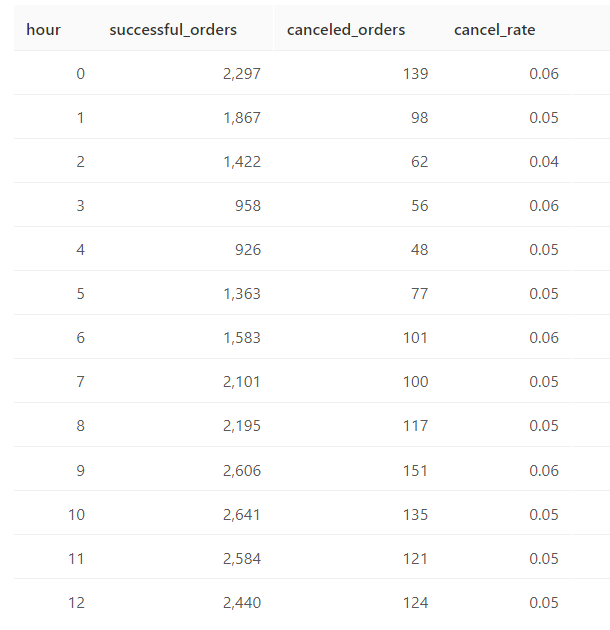

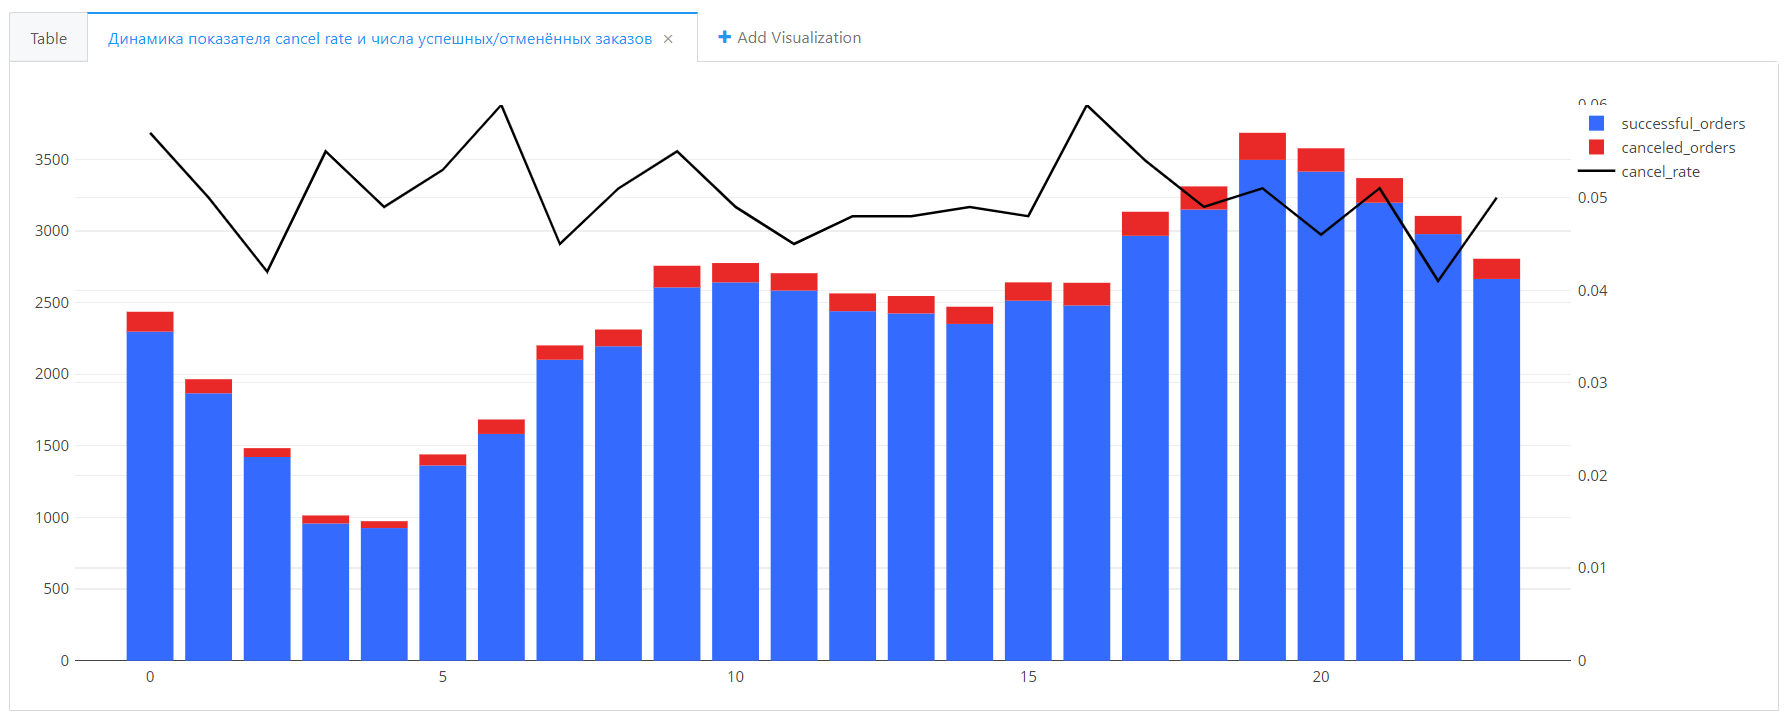